In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase

from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

import folium
from IPython.display import HTML
from IPython.display import IFrame

from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [16]:
df=pd.read_excel('countrycodes.xlsx')
df.head()

,name,code,numberspecies,speciesnodup
0,United States,US,35,11
1,Madagascar,MG,25,6
2,People's Republic of China,CN,7,3
3,India,IN,7,3
4,Thailand,TH,7,3


/anaconda/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


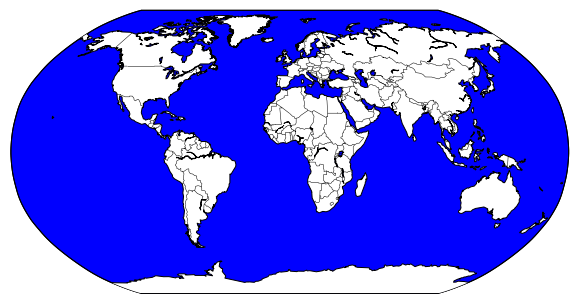

In [14]:
fig,ax=plt.subplots()
fig.set_size_inches(10,6)

m=Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawcoastlines()
m.drawcountries()

m.fillcontinents(color='white',lake_color='blue')
m.drawmapboundary(fill_color='blue')

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


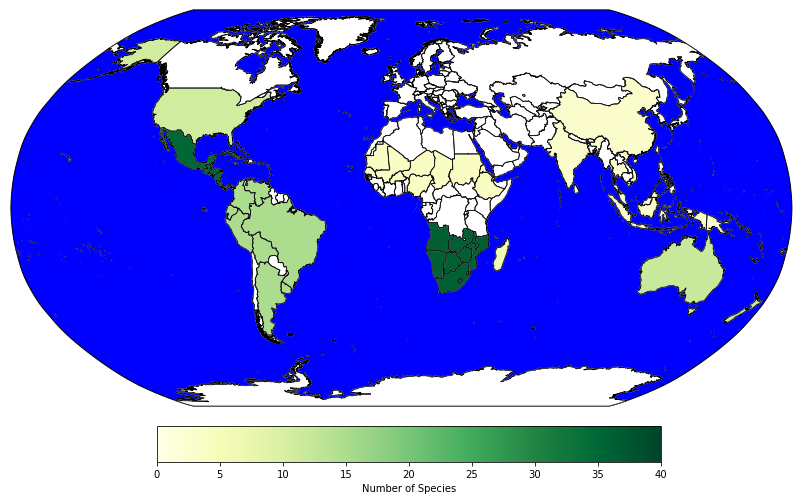

In [5]:
df=pd.read_excel('countrycodes.xlsx')

vmin=0
vmax=40

df['NewScale']=(df.speciesnodup-vmin)/(vmax-vmin)

cmap=plt.cm.YlGn

fig,ax=plt.subplots()
fig.set_size_inches(14,10)

m=Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.drawmapboundary(fill_color='blue')
shp_info = m.readshapefile('ne_10m_admin_0_countries/ne_10m_admin_0_countries','countries',drawbounds=True)

for count,shape_dict in enumerate(m.countries_info):
    if shape_dict['NAME'] in df.name.values:
        color=rgb2hex(cmap(df.NewScale[df.name==shape_dict['NAME']].item()))
    else:
        color='white'
        
    seg=m.countries[count]
    poly=Polygon(seg,facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

coloraxis = fig.add_axes([0.27, 0.15, 0.5, 0.05])
norm = Normalize(vmin=vmin, vmax=vmax)
colorbar = ColorbarBase(coloraxis,cmap=cmap,norm=norm, orientation='horizontal')
color_bar_title='Number of Species'
colorbar.ax.set_xlabel(color_bar_title)   
ax.axis('off')

fig.savefig('ColorRegions.png',transparent=True)

(0.0, 33973592.329973608, 0.0, 17230998.10013628)

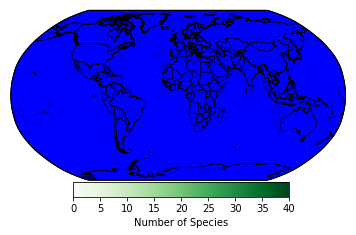

In [7]:
df=pd.read_excel('countrycodes.xlsx')

vmin=0
vmax=40

df['NewScale']=(df.speciesnodup-vmin)/(vmax-vmin)

cmap=plt.cm.Greens

fig,ax=plt.subplots()

m=Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
shp_info = m.readshapefile('ne_10m_admin_0_countries/ne_10m_admin_0_countries','countries',drawbounds=True)

for count,shape_dict in enumerate(m.countries_info):
    if shape_dict['NAME'] in df.name.values:
        color=rgb2hex(cmap(df.NewScale[df.name==shape_dict['NAME']].item()))
    else:
        color='white'
        
    seg=m.countries[count]
    poly=Polygon(seg,facecolor=color,edgecolor='gray')
    ax.add_patch(poly)

m.drawmapboundary(fill_color='blue')

coloraxis = fig.add_axes([0.27, 0.15, 0.5, 0.05])
norm = Normalize(vmin=vmin, vmax=vmax)
colorbar = ColorbarBase(coloraxis,cmap=cmap,norm=norm, orientation='horizontal')
color_bar_title='Number of Species'
colorbar.ax.set_xlabel(color_bar_title)   
ax.axis('off')

fig.savefig('ColorRegions.png')

{-180.0: ([<matplotlib.lines.Line2D at 0x118400f90>], []),
 -160.0: ([<matplotlib.lines.Line2D at 0x118417650>], []),
 -140.0: ([<matplotlib.lines.Line2D at 0x118417c90>], []),
 -120.0: ([<matplotlib.lines.Line2D at 0x118432310>], []),
 -100.0: ([<matplotlib.lines.Line2D at 0x118432950>], []),
 -80.0: ([<matplotlib.lines.Line2D at 0x118432f90>], []),
 -60.0: ([<matplotlib.lines.Line2D at 0x118448610>], []),
 -40.0: ([<matplotlib.lines.Line2D at 0x118448c50>], []),
 -20.0: ([<matplotlib.lines.Line2D at 0x1184592d0>], []),
 0.0: ([<matplotlib.lines.Line2D at 0x118459910>], []),
 20.0: ([<matplotlib.lines.Line2D at 0x118459f50>], []),
 40.0: ([<matplotlib.lines.Line2D at 0x11846d5d0>], []),
 60.0: ([<matplotlib.lines.Line2D at 0x11846dc10>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x1160d4290>], []),
 100.0: ([<matplotlib.lines.Line2D at 0x1160d48d0>], []),
 120.0: ([<matplotlib.lines.Line2D at 0x1160d4f10>], []),
 140.0: ([<matplotlib.lines.Line2D at 0x1160d9590>], []),
 160.0: ([<matp

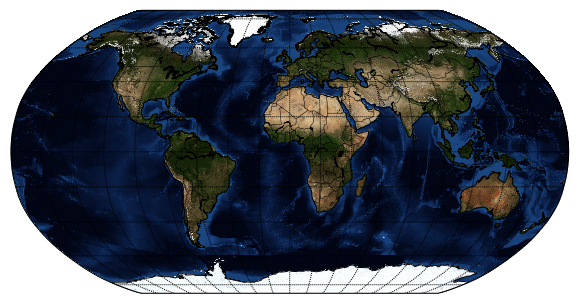

In [9]:
df2=pd.read_excel('NearbyMajorCities.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(10,8)

m=Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

In [3]:
for index,row in df2.iterrows():
    print row.Latitude,row.Longitude,row.TownName

-29.8579 31.0292 Durban, South Africa
-18.91368 47.53613 Antananarivo, Madagascar
34.05223 -118.24368 Los Angeles, United States
17.96667 102.6 Vientiane, Laos
-37.814251 144.963169 Melbourne, Australia
-41.279123 174.782376 Wellington, New Zealand
6.269877 -75.563083 Medellín, Colombia
8.985951 38.768073 Addis Ababa, Ethiopia
33.989177 -6.85215 Rabat, Morocco
19.446808 -99.137645 Mexico City, Mexico


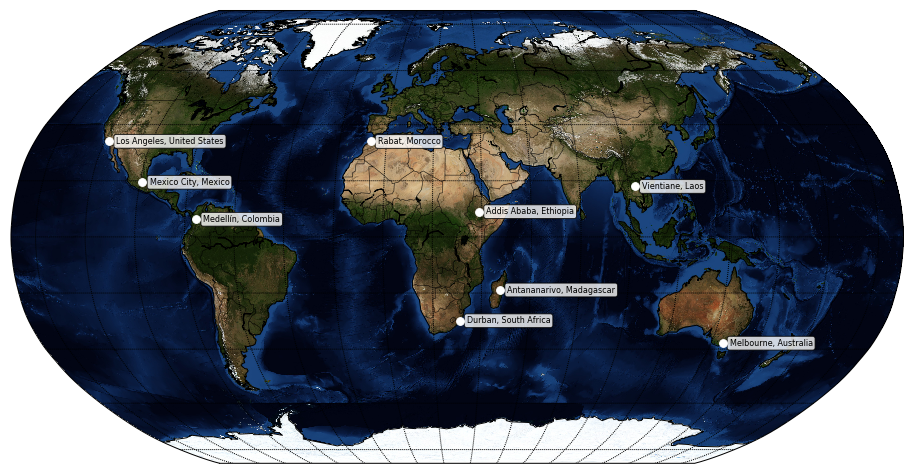

In [13]:
fig,ax=plt.subplots()
fig.set_size_inches(16,12)

m=Basemap(projection='robin',lon_0=30,ax=ax,resolution='c')
m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x,y=m(df2.Longitude.values,df2.Latitude.values)
ax.scatter(x,y,zorder=10,s=60,c='white')

props=dict(boxstyle='round',facecolor='white',alpha=0.8)
for index,row in df2.iterrows():
    tx,ty=m(row.Longitude+3.0,row.Latitude)
    textstr=row.TownName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)
    
fig.savefig('Marble1.png')

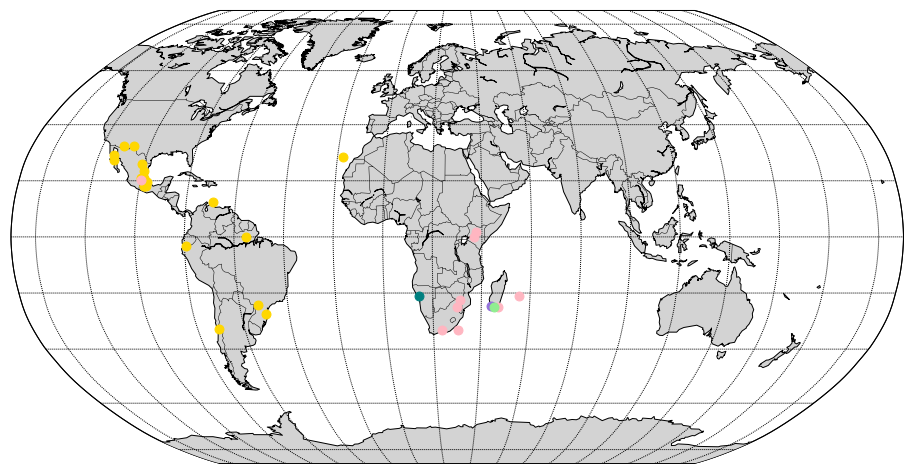

In [6]:
typea=pd.read_excel('Endangered1.xls')
typeb=pd.read_excel('Endangered2.xls')
typec=pd.read_excel('Endangered3.xls')
typed=pd.read_excel('Endangered4.xlsx')
typee=pd.read_excel('Endangered5.xlsx')

fig,ax=plt.subplots()
fig.set_size_inches(16,12)

m=Basemap(projection='robin',lon_0=30,ax=ax,resolution='c')
#m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.fillcontinents(color='lightgrey',lake_color='white')
m.drawmapboundary(fill_color='white')

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))

x2,y2=m(typeb.Longitude.values,typeb.Latitude.values)
ax.scatter(x2,y2,zorder=10,s=80,c='gold')

x4,y4=m(typed.Longitude.values,typed.Latitude.values)
ax.scatter(x4,y4,zorder=10,s=80,c='lightpink')

x,y=m(typea.Longitude.values,typea.Latitude.values)
ax.scatter(x,y,zorder=10,s=80,c='mediumpurple')

x3,y3=m(typec.Longitude.values,typec.Latitude.values)
ax.scatter(x3,y3,zorder=10,s=80,c='lightgreen')

x5,y5=m(typee.Longitude.values,typee.Latitude.values)
ax.scatter(x5,y5,zorder=10,s=80,c='teal')

"""props=dict(boxstyle='round',facecolor='white',alpha=0.8)
for index,row in df2.iterrows():
    tx,ty=m(row.Longitude+3.0,row.Latitude)
    textstr=row.TownName
    ax.text(tx,ty,textstr,fontsize=8,verticalalignment='center',horizontalalignment='left',bbox=props)"""
    
fig.savefig('Basic2.png',transparent=True)

ValueError: too many values to unpack

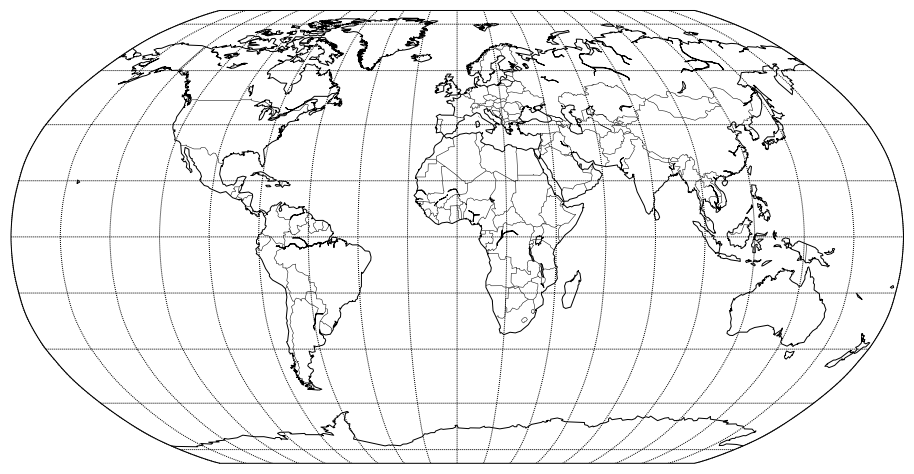

In [35]:
# Fuck this shit i'm out

df4=pd.read_csv('Endangered.csv')

fig,ax=plt.subplots()
fig.set_size_inches(16,12)

m=Basemap(projection='robin',lon_0=0,ax=ax,resolution='c')
#m.bluemarble()
m.drawcoastlines()
m.drawcountries()

m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))


#ax.scatter(x,y,zorder=10,s=60,color='b')

x,y=m(df4.Longitude.values,df4.Latitude.values)
for i,p in df4.Family:
    ax.scatter(x,y,zorder=10,s=60,c=p)
    if df4[i]=='Cactaceae':
        p='blue'
    elif df4[i]=='Apocynaceae':
        p='orange'
    elif df4[i]=='Didiereaceae':
        p='pink'
    elif df4[i]=='Euphorbiaceae':
        p='green'
    elif df4[i]=='Welwitschiaceae':    
        p='black'
    else:
        p='white'
               
#ax.scatter(x,y,zorder=10,s=60,c='white')


#ax.scatter(df4.Longitude[df4.Family=='Apocynaceae'],df4.Latitude[df4.Family=='Apocynaceae'],zorder=10,s=60,color='blue')
#ax.scatter(df4.Longitude[df4.Family=='Cactaceae'].values,df4.Latitude[df4.Family=='Cactaceae'].values,zorder=10,s=60,color='red')
#ax.scatter(df4.Longitude[df4.Family=='Didiereaceae'],df4.Latitude[df4.Family=='Didiereaceae'],zorder=10,s=60,color='orange')
#ax.scatter(df4.Longitude[df4.Family=='Euphorbiaceae'],df4.Latitude[df4.Family=='Euphorbiaceae'],zorder=10,s=60,color='yellow')
#ax.scatter(df4.Longitude[df4.Family=='Welwitschiaceae'],df4.Latitude[df4.Family=='Welwitschiaceae'],zorder=10,s=60,color='green')




"""ax.scatter(df3.Longitude[df3.Number==1],df3.Latitude[df3.Number==1],zorder=10,s=60,color='blue')
ax.scatter(df3.Longitude[df3.Number==2],df3.Latitude[df3.Number==2],zorder=10,s=60,color='red')
ax.scatter(df3.Longitude[df3.Number==3],df3.Latitude[df3.Number==3],zorder=10,s=60,color='orange')
ax.scatter(df3.Longitude[df3.Number==4],df3.Latitude[df3.Number==4],zorder=10,s=60,color='yellow')
ax.scatter(df3.Longitude[df3.Number==5],df3.Latitude[df3.Number==5],zorder=10,s=60,color='green')"""

    
#fig.savefig('Marble1.png')